# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
#[c for c in df_train if df_train[c].dtype == 'object']

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Ученая степень', 'Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Неполное среднее', 'Высшее'}


MARITAL_STATUS
{'Состою в браке', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Строительство', 'Наука', 'Сборочные производства', 'Развлечения/Искусство', 'Маркетинг', 'Юридические услуги/нотариальные услуги', 'Подбор персонала', 'Здравоохранение', 'Информационные услуги', 'Информационные технологии', 'Страхование', 'Салоны красоты и здоровья', 'Энергетика', 'Образование', 'Логистика', 'ЧОП/Детективная д-ть', 'Коммунальное хоз-во/Дорожные службы', 'Торговля', 'Государственная служба', 'Химия/Парфюмерия/Фармацевтика', 'Банк/Финансы', 'Управляющая компания', 'Другие сферы', 'Ресторанный бизнес/Общественное питание', 'Недвижимость', 'Туризм', 'Сельское хозяйство', 'Нефтегазовая промышленность', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Ответ 1. Пропуски есть в  следующих данных:
    GEN_INDUSTRY - отрасль работы клиента
        Если признак отсутствует, то нужно заполнить его значением "неопределено".
    GEN_TITLE - должность
        Если признак отсутствует, то нужно заполнить его значением "неопределено".
    ORG_TP_STATE - форма собственности компании    
        Если признак отсутствует, то нужно заполнить его значением "неопределено".
    ORG_TP_FCAPITAL - отношение к иностранному капиталу
        Если признак отсутствует, то нужно заполнить его значением "неопределено".
    JOB_DIR - направление деятельности внутри компании
        Если признак отсутствует, то нужно заполнить его значением "неопределено".
    TP_PROVINCE - область торговой точки, где клиент брал послед...
        Если признак отсутствует, то нужно заполнить его значением "неопределено".
    WORK_TIME - время работы на текущем месте (в месяцах)
        Если признак отсутствует, то нужно заполнить его значением 0.
    PREVIOUS_CARD_NUM_UTILIZED - количество уже утилизированных карт ( если пус...
        Если признак отсутствует, то нужно заполнить его значением 0.


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Ответ 2. Есть.
    Столбцы GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE - с помощью функции get_dummies разобьем на множество столбцов со значениями 0 и 1. Например:
    pd.get_dummies(df,columns=[GEN_INDUSTRY],[GEN_TITLE],[ORG_TP_STATE],[ORG_TP_FCAPITAL],[JOB_DIR],[TP_PROVINCE])
       
   Столбец PREVIOUS_CARD_NUM_UTILIZED разобьем на 2 класса :
       0 - еще не было утилизировано ни одной карты (в том числе и пропуски)
       1 - была утилизирована хотя бы одна карта.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preproc_data(df_input):
    import pandas as pd
    df_output = df_input.copy()
    df_output=df_output.drop(['AGREEMENT_RK'], axis=1)
    
    float_columns = ['PERSONAL_INCOME','CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT']
    df_output[float_columns] = df_output[float_columns].applymap(lambda x: x.replace(',', '.')).astype('float')
    
    string_columns = ['GEN_INDUSTRY', 'GEN_TITLE','ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE']
    for col in string_columns:
        df_output[col] = df_output[col].map(lambda x: "Неопределено" if pd.isnull(x) else x)

    df_output["WORK_TIME"] = df_output["WORK_TIME"].map(lambda x: 0 if pd.isnull(x) else x)
    df_output["PREVIOUS_CARD_NUM_UTILIZED"] = df_output["PREVIOUS_CARD_NUM_UTILIZED"].map(lambda x: 0 if pd.isnull(x) else 1)
    
    object_columns = [c for c in df_output if df_output[c].dtype == 'object' and c!='sample']    
    
    df_output = pd.get_dummies(df_output,columns=object_columns)
    
        
    return df_output

In [18]:
dd = preproc_data(df)
dd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 450 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(32), object(1), uint8(411)
memory usage: 20.8+ MB


In [19]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [20]:
y_train=df_train_preproc['TARGET']

y_test=df_test_preproc['TARGET']

In [21]:
df_train_preproc=df_train_preproc.drop(['TARGET'],axis=1)
df_test_preproc=df_test_preproc.drop(['TARGET'],axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [22]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train1,X_test1,y_train1,y_test1=train_test_split(df_train_preproc,y_train,test_size=0.3,random_state=42)



c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#     fit
# Модель 1
dtc1=DecisionTreeClassifier()
dtc1.fit(X_train1,y_train1)
predict1=dtc1.predict(X_test1)

#pd.DataFrame(list(zip(predict1,y_train1)))

from sklearn.metrics import accuracy_score
accuracy_score(y_test1,predict1)


0.795708342456755

In [24]:
#     predict
# Модель 2
dtc2=RandomForestClassifier()
dtc2.fit(X_train1,y_train1)
predict2=dtc2.predict(X_test1)

accuracy_score(y_test1,predict2)

0.877162250930589

In [25]:
#     predict_proba
# Модель 3
rfc1=DecisionTreeClassifier()
rfc1.fit(X_train1,y_train1)
predict3=rfc1.predict_proba(X_test1)

predict3[:,1]
#predict3[:,0]


array([1., 1., 0., ..., 0., 0., 0.])

In [26]:
# Модель 4
rfc2=RandomForestClassifier()
rfc2.fit(X_train1,y_train1)
predict4=rfc2.predict_proba(X_test1)

predict4[:,1]
#predict4[:,0]


array([0.6, 0.3, 0.3, ..., 0.1, 0.5, 0.2])

In [27]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
# Модель 1
print('precision1',precision_score(y_test1,predict1))
print('recall1',recall_score(y_test1,predict1))
print('accuracy1',accuracy_score(y_test1,predict1))


precision1 0.15129151291512916
recall1 0.14774774774774774
accuracy1 0.795708342456755


In [28]:
# Модель 2
print('precision2',precision_score(y_test1,predict2))
print('recall2',recall_score(y_test1,predict2))
print('accuracy2',accuracy_score(y_test1,predict2))


precision2 0.35
recall2 0.012612612612612612
accuracy2 0.877162250930589


In [29]:
# Модель 3
print('precision3',precision_score(y_test1,predict3[:,1]))
print('recall3',recall_score(y_test1,predict3[:,1]))
print('accuracy3',accuracy_score(y_test1,predict3[:,1]))


precision3 0.1636029411764706
recall3 0.16036036036036036
accuracy3 0.7983358878913948


In [30]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

from sklearn.metrics import precision_recall_curve
precision1,recall1,thresholds1=precision_recall_curve(y_test1,predict1)
precision2,recall2,thresholds2=precision_recall_curve(y_test1,predict2)
precision3,recall3,thresholds3=precision_recall_curve(y_test1,predict3[:,1])
precision4,recall4,thresholds4=precision_recall_curve(y_test1,predict4[:,1])


(-0.01, 1.01)

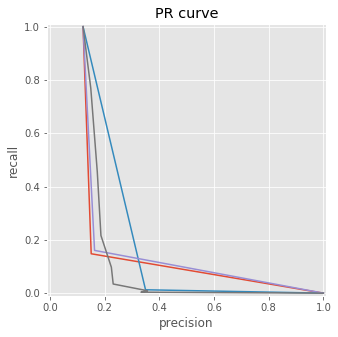

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(precision1,recall1)
plt.plot(precision2,recall2)
plt.plot(precision3,recall3)
plt.plot(precision4,recall4)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01,1.01))
plt.ylim((-0.01,1.01))


(-0.01, 1.01)

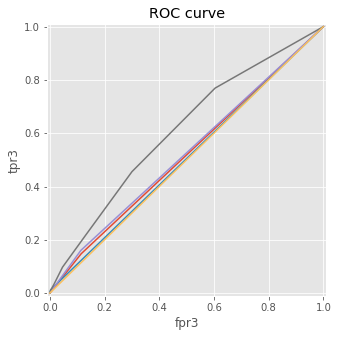

In [32]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
fpr1,tpr1,thresholds1=roc_curve(y_test1,predict1)
fpr2,tpr2,thresholds2=roc_curve(y_test1,predict2)
fpr3,tpr3,thresholds3=roc_curve(y_test1,predict3[:,1])
fpr4,tpr4,thresholds4=roc_curve(y_test1,predict4[:,1])


plt.figure(figsize=(5,5))
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.plot(fpr3,tpr3)
plt.plot(fpr4,tpr4)

plt.plot([0,1],[0,1])
plt.ylabel('tpr3')
plt.xlabel('fpr3')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01,1.01))
plt.ylim((-0.01,1.01))

Вывод: Модель № 4 лучше.

In [33]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Модель 1
rfc1=DecisionTreeClassifier()
cross_val_score(
    rfc1,
    X_train1,
    y_train1,
    scoring='roc_auc',
    cv=10
    )


array([0.5248227 , 0.55027018, 0.51504559, 0.51626984, 0.5067798 ,
       0.53725937, 0.51001351, 0.53751064, 0.51748936, 0.50436209])

In [34]:
# Модель 2
rfc2=RandomForestClassifier()
cross_val_score(
    rfc2,
    X_train1,
    y_train1,
    scoring='roc_auc',
    cv=10
    )


array([0.61067629, 0.60280311, 0.58847518, 0.61175279, 0.62941574,
       0.54051418, 0.56765451, 0.53629787, 0.57209362, 0.60348456])

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test1,predict3[:,1])

0.523475294836212

In [36]:
roc_auc_score(y_test1,predict4[:,1])

0.6089562393899383

In [37]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

rfc2=RandomForestClassifier()
rfc2.fit(X_train1,y_train1)
predict4=rfc2.predict_proba(X_test1)

#predict4[:,1]
predict4

array([[0.9, 0.1],
       [0.7, 0.3],
       [0.7, 0.3],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [0.9, 0.1]])

In [38]:
# Померить roc_auc на тесте


In [39]:
roc_auc_score(y_test1,predict4[:,1])

0.578585414926392